Importing the necessary libraries and datsets

In [256]:
import pandas as pd
import numpy as np
amzn_tweet = pd.read_csv('dataset/EDA_amazon_tweets.csv')
msft_tweet = pd.read_csv('dataset/EDA_microsoft_tweets.csv')
tesla_tweet = pd.read_csv('dataset/EDA_tesla_tweets.csv')
ggl_tweet = pd.read_csv('dataset/EDA_google_tweets.csv')
apl_tweet = pd.read_csv('dataset/EDA_apple_tweets.csv')
#merging all tweets
tweets= pd.concat([amzn_tweet,msft_tweet,tesla_tweet,ggl_tweet,apl_tweet],axis=0)
amzn_stock = pd.read_csv('dataset/amzn_stock.csv')
apple_stock = pd.read_csv('dataset/apple_stock.csv')
google_stock = pd.read_csv('dataset/google_stock.csv')
microsoft_stock = pd.read_csv('dataset/microsoft_stock.csv')
tesla_stock = pd.read_csv('dataset/tesla_stock.csv')
senti_amzn_tweet=pd.read_csv('dataset/Sentiment_amazon_tweets2.csv')
senti_apple_tweet=pd.read_csv('dataset/Sentiment_apple_tweets2.csv')
senti_google_tweet=pd.read_csv('dataset/Sentiment_google_tweets2.csv')
senti_microsoft_tweet=pd.read_csv('dataset/Sentiment_microsoft_tweets2.csv')
senti_tesla_tweet=pd.read_csv('dataset/Sentiment_tesla_tweets2.csv')
senti_tweets=pd.concat([senti_amzn_tweet,senti_apple_tweet,senti_google_tweet,senti_microsoft_tweet,senti_tesla_tweet],axis=0)




    


In [254]:
amzn_tweet

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,vander_score,vander_sentiment
0,1145483574717497344,muckdog,2019-07-01,Had an interesting conversation with friends y...,0,1,0,AMZN,0.7579,Positive
1,1145485860021792768,EliteOptions2,2019-07-01,$NVDA - Trade Idea - July 5th 170C - bid/ask: ...,2,2,14,AMZN,0.0000,Neutral
2,1145487616004874241,EliteOptions2,2019-07-01,$BABA - Trade Idea - July 5th 172.50C - bid/as...,1,3,18,AMZN,-0.2023,Negative
3,1145488552710430720,EliteOptions2,2019-07-01,Two Day Risk-Free Trial Join us tonight (9PM E...,1,1,1,AMZN,0.2960,Positive
4,1145489717045207041,ExactOptionPick,2019-07-01,ACTIVE TRADERS Try one of these FREE trading g...,0,0,0,AMZN,0.8159,Positive
...,...,...,...,...,...,...,...,...,...,...
65713,1211795035747803136,Nghii_trann,2019-12-30,"tmr game plan:$amzn if 1840 holds, potentially...",0,0,0,AMZN,0.5994,Positive
65714,1211796098588856320,InceptionTrader,2019-12-30,Wonder how much $amzn premium mm made today on...,1,0,0,AMZN,0.0000,Neutral
65715,1211796368337113088,StckPro,2019-12-30,$AMZN NEW ARTICLE : Amazon employees struggle ...,0,0,0,AMZN,-0.2406,Negative
65716,1211797422755569664,YakobCa,2019-12-30,Did they take $AMZN call off today? Did you se...,0,0,0,AMZN,0.5502,Positive


In [179]:
tweets = tweets.loc[:, ~tweets.columns.str.contains('^Unnamed')]
amzn_tweet = amzn_tweet.loc[:, ~amzn_tweet.columns.str.contains('^Unnamed')]
tesla_tweet = tesla_tweet.loc[:, ~tesla_tweet.columns.str.contains('^Unnamed')]
ggl_tweet = ggl_tweet.loc[:, ~ggl_tweet.columns.str.contains('^Unnamed')]
apl_tweet = apl_tweet.loc[:, ~apl_tweet.columns.str.contains('^Unnamed')]
msft_tweet = msft_tweet.loc[:, ~msft_tweet.columns.str.contains('^Unnamed')]

In [180]:
tweets

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol
0,1145483574717497344,muckdog,2019-07-01,Had an interesting conversation with friends y...,0,1,0,AMZN
1,1145485860021792768,EliteOptions2,2019-07-01,$NVDA - Trade Idea - July 5th 170C - bid/ask: ...,2,2,14,AMZN
2,1145487616004874241,EliteOptions2,2019-07-01,$BABA - Trade Idea - July 5th 172.50C - bid/as...,1,3,18,AMZN
3,1145488552710430720,EliteOptions2,2019-07-01,Two Day Risk-Free Trial Join us tonight (9PM E...,1,1,1,AMZN
4,1145489717045207041,ExactOptionPick,2019-07-01,ACTIVE TRADERS Try one of these FREE trading g...,0,0,0,AMZN
...,...,...,...,...,...,...,...,...
162824,1211794905347088384,MrR17941987,2019-12-30,"Dumb question, is this enough people to run a ...",0,1,7,TSLA
162825,1211797923475836929,_TeslaTom,2019-12-30,Thanks Mate!Haha that’d be $TSLA style growth,0,0,2,TSLA
162826,1211798847543865345,maythefroth,2019-12-30,$TSLA: Tesla has a deadly unintended accelerat...,0,0,0,TSLA
162827,1211798922466865153,ExactOptionPick,2019-12-30,See how many winning picks you get in 7 days (...,0,0,2,TSLA


Calculating the vanderscore and vandersentiment

In [181]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    return score

Vander score and vandersentiment of amazon tweets

In [182]:
amzn_tweet['vander_score'] = amzn_tweet['body'].apply(lambda tweet: getVanderScore(tweet))
amzn_tweet['vander_sentiment'] = amzn_tweet['vander_score'].apply(lambda score: getVanderSentiment(score))
amzn_tweet.head()

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,vander_score,vander_sentiment
0,1145483574717497344,muckdog,2019-07-01,Had an interesting conversation with friends y...,0,1,0,AMZN,0.7579,Positive
1,1145485860021792768,EliteOptions2,2019-07-01,$NVDA - Trade Idea - July 5th 170C - bid/ask: ...,2,2,14,AMZN,0.0000,Neutral
2,1145487616004874241,EliteOptions2,2019-07-01,$BABA - Trade Idea - July 5th 172.50C - bid/as...,1,3,18,AMZN,-0.2023,Negative
3,1145488552710430720,EliteOptions2,2019-07-01,Two Day Risk-Free Trial Join us tonight (9PM E...,1,1,1,AMZN,0.2960,Positive
4,1145489717045207041,ExactOptionPick,2019-07-01,ACTIVE TRADERS Try one of these FREE trading g...,0,0,0,AMZN,0.8159,Positive


Calculating the total number of positive ,negative and neutral tweets in amazon tweets

In [183]:
temp = amzn_tweet.groupby('vander_sentiment').count()['body'].reset_index().sort_values(by='body',ascending=False)
temp.style.background_gradient(cmap='Purples')

,vander_sentiment,body
2,Positive,33011
1,Neutral,21233
0,Negative,11474


Vander score and vandersentiment of tesla tweets

In [184]:
tesla_tweet['vander_score'] = tesla_tweet['body'].apply(lambda tweet: getVanderScore(tweet))
tesla_tweet['vander_sentiment'] = tesla_tweet['vander_score'].apply(lambda score: getVanderSentiment(score))
tesla_tweet.head()

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,vander_score,vander_sentiment
0,1145483140892385280,pennystocksw,2019-07-01,$AABB all eyes on it for that $0.02 break next...,0,8,8,AAPL,0.0000,Neutral
1,1145484092814909446,MelissaDiederi5,2019-07-01,Join @RobinhoodApp and we'll both get a stock ...,0,0,0,AAPL,0.8519,Positive
2,1145485860021792768,EliteOptions2,2019-07-01,$NVDA - Trade Idea - July 5th 170C - bid/ask: ...,2,2,14,AAPL,0.0000,Neutral
3,1145487464674598913,MrMiguelli,2019-07-01,All $BA and $AAPL. We’ll see how long this pum...,0,1,2,AAPL,0.0000,Neutral
4,1145487616004874241,EliteOptions2,2019-07-01,$BABA - Trade Idea - July 5th 172.50C - bid/as...,1,3,18,AAPL,-0.2023,Negative


Calculating the total number of positive ,negative and neutral tweets in tesla tweets

In [185]:
temp = tesla_tweet.groupby('vander_sentiment').count()['body'].reset_index().sort_values(by='body',ascending=False)
temp.style.background_gradient(cmap='Purples')

,vander_sentiment,body
2,Positive,37904
1,Neutral,35935
0,Negative,16344


Vander score and vandersentiment of microsoft tweets

In [186]:
msft_tweet['vander_score'] = msft_tweet['body'].apply(lambda tweet: getVanderScore(tweet))
msft_tweet['vander_sentiment'] = msft_tweet['vander_score'].apply(lambda score: getVanderSentiment(score))
msft_tweet.head()

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,vander_score,vander_sentiment
0,1145483293372166145,TalkMarkets,2019-07-01,What Trade Earned Us 60% In June? And Which St...,0,0,0,GOOGL,0.0000,Neutral
1,1145485860021792768,EliteOptions2,2019-07-01,$NVDA - Trade Idea - July 5th 170C - bid/ask: ...,2,2,14,GOOG,0.0000,Neutral
2,1145485860021792768,EliteOptions2,2019-07-01,$NVDA - Trade Idea - July 5th 170C - bid/ask: ...,2,2,14,GOOGL,0.0000,Neutral
3,1145487616004874241,EliteOptions2,2019-07-01,$BABA - Trade Idea - July 5th 172.50C - bid/as...,1,3,18,GOOG,-0.2023,Negative
4,1145487616004874241,EliteOptions2,2019-07-01,$BABA - Trade Idea - July 5th 172.50C - bid/as...,1,3,18,GOOGL,-0.2023,Negative


Calculating the total number of positive ,negative and neutral tweets in microsoft tweets

In [187]:
temp = msft_tweet.groupby('vander_sentiment').count()['body'].reset_index().sort_values(by='body',ascending=False)
temp.style.background_gradient(cmap='Purples')

,vander_sentiment,body
2,Positive,20734
1,Neutral,19449
0,Negative,6724


Vander score and vandersentiment of apple tweets

In [188]:
apl_tweet['vander_score'] = apl_tweet['body'].apply(lambda tweet: getVanderScore(tweet))
apl_tweet['vander_sentiment'] = apl_tweet['vander_score'].apply(lambda score: getVanderSentiment(score))
apl_tweet.head()

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,vander_score,vander_sentiment
0,1145482335019646977,MelaynaLokosky,2019-07-01,If a $TSLA #Tesla #ElonMusk loving astroturfin...,0,0,0,TSLA,0.25,Positive
1,1145483140892385280,pennystocksw,2019-07-01,$AABB all eyes on it for that $0.02 break next...,0,8,8,TSLA,0.00,Neutral
2,1145483819933425664,markbspiegel,2019-07-01,Hey quick reminder: Q3 $TSLA sales start even ...,6,0,29,TSLA,0.00,Neutral
3,1145484202558853120,PortfolioBuzz,2019-07-01,Tickers trending on TWTR in last 1 hour $Block...,0,0,0,TSLA,0.00,Neutral
4,1145484323572912129,Dreamestorical,2019-07-01,50 MA has acted as resistance for $TSLA in the...,0,0,0,TSLA,0.00,Neutral


Calculating the total number of positive ,negative and neutral tweets in apple tweets

In [189]:
temp = apl_tweet.groupby('vander_sentiment').count()['body'].reset_index().sort_values(by='body',ascending=False)
temp.style.background_gradient(cmap='Blues')

,vander_sentiment,body
2,Positive,71700
1,Neutral,49356
0,Negative,41773


Vander score and vandersentiment of google tweets

In [190]:
ggl_tweet['vander_score'] = ggl_tweet['body'].apply(lambda tweet: getVanderScore(tweet))
ggl_tweet['vander_sentiment'] = ggl_tweet['vander_score'].apply(lambda score: getVanderSentiment(score))
ggl_tweet.head()

,tweet_id,writer,Date,body,comment_num,retweet_num,like_num,ticker_symbol,vander_score,vander_sentiment
0,1145483386326323202,SergDJB,2019-07-01,$SPY $FB $QQQ $mu $QCOM $BABA $DIS $BAC $NVCN ...,0,1,6,MSFT,0.0000,Neutral
1,1145488752573218816,MrDPAQ,2019-07-01,Your thoughts....$MSFT,1,1,0,MSFT,0.0000,Neutral
2,1145489154178002944,AmericanBanking,2019-07-01,Zacks: Brokerages Anticipate Microsoft Co. $MS...,0,0,0,MSFT,0.0000,Neutral
3,1145495770185027585,TalkMarkets,2019-07-01,How To Find Undervalued Stocks W/ Strong Funda...,1,0,0,MSFT,0.7804,Positive
4,1145497513295843328,Gr8ful4Crypto,2019-07-01,$MSFT $JNJ,0,1,0,MSFT,0.0000,Neutral


Calculating the total number of positive ,negative and neutral tweets in google tweets

In [191]:
temp = ggl_tweet.groupby('vander_sentiment').count()['body'].reset_index().sort_values(by='body',ascending=False)
temp.style.background_gradient(cmap='Purples')

,vander_sentiment,body
2,Positive,14630
1,Neutral,13443
0,Negative,4930


<AxesSubplot:xlabel='vander_sentiment', ylabel='count'>

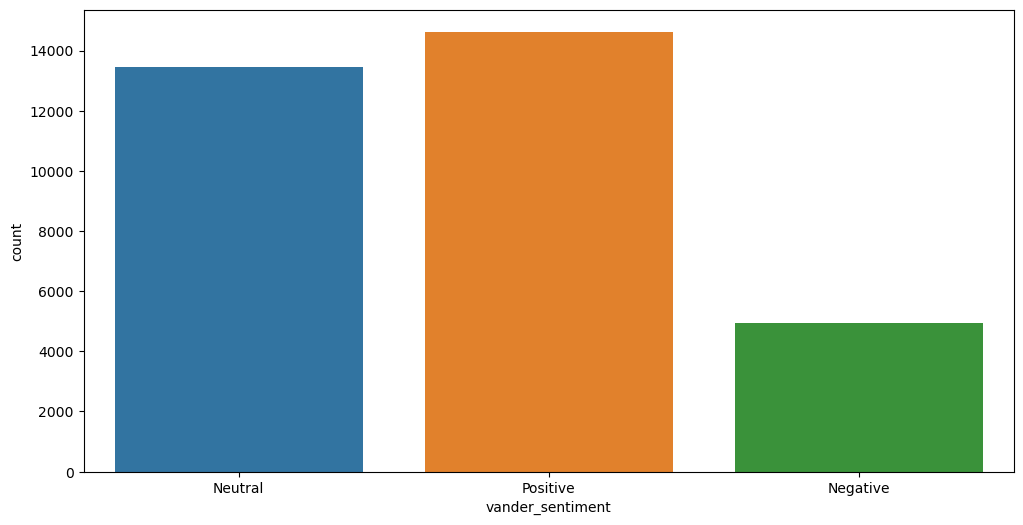

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x='vander_sentiment',data=ggl_tweet)

<AxesSubplot:xlabel='vander_sentiment', ylabel='count'>

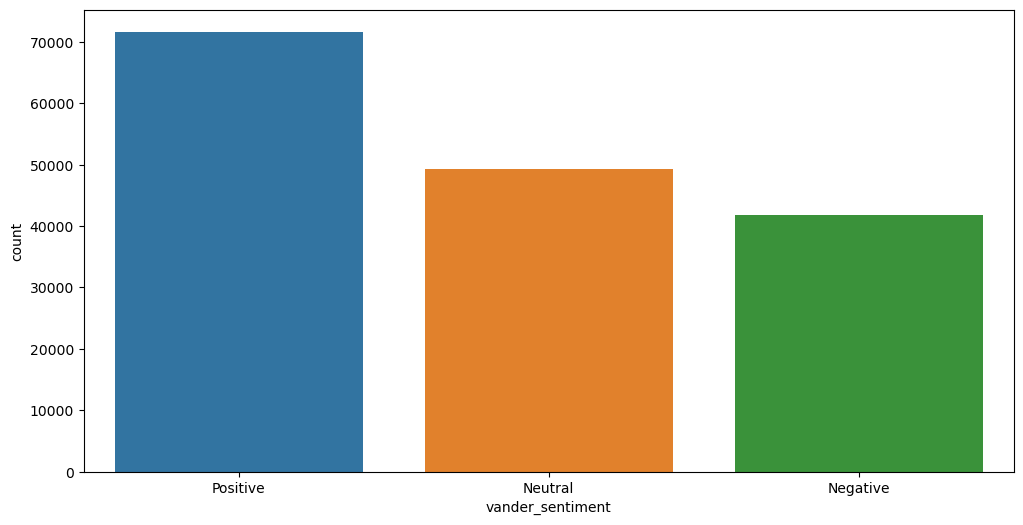

In [193]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='vander_sentiment',data=apl_tweet)

<AxesSubplot:xlabel='vander_sentiment', ylabel='count'>

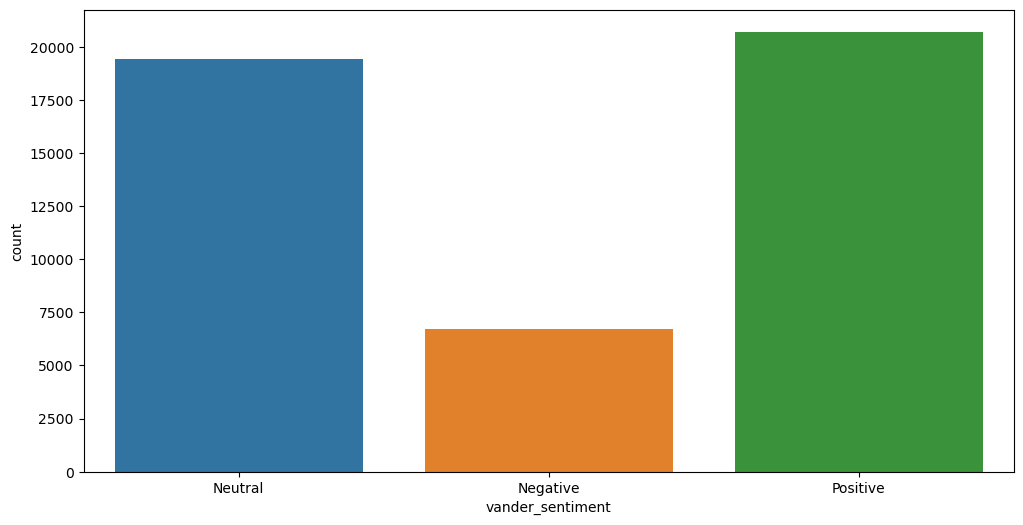

In [194]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='vander_sentiment',data=msft_tweet)

<AxesSubplot:xlabel='vander_sentiment', ylabel='count'>

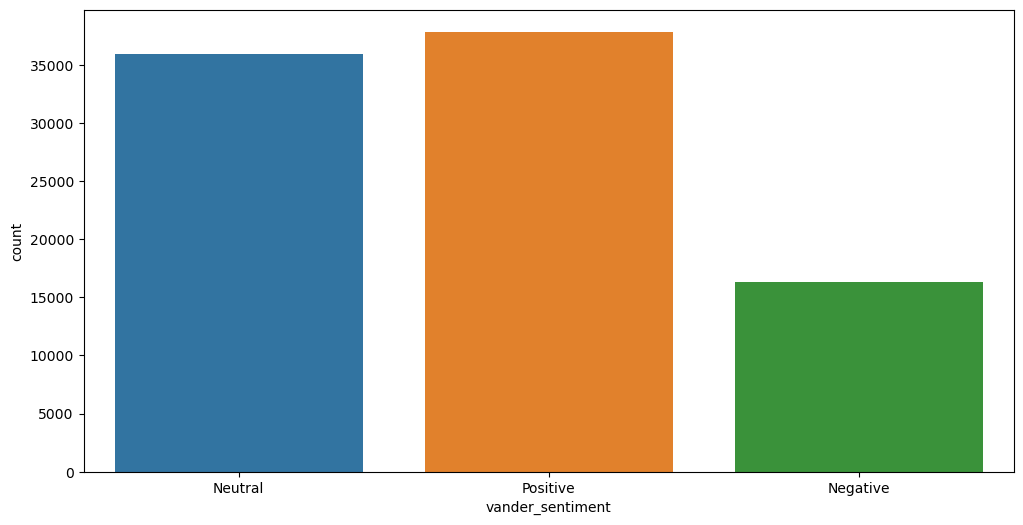

In [195]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='vander_sentiment',data=tesla_tweet)

<AxesSubplot:xlabel='vander_sentiment', ylabel='count'>

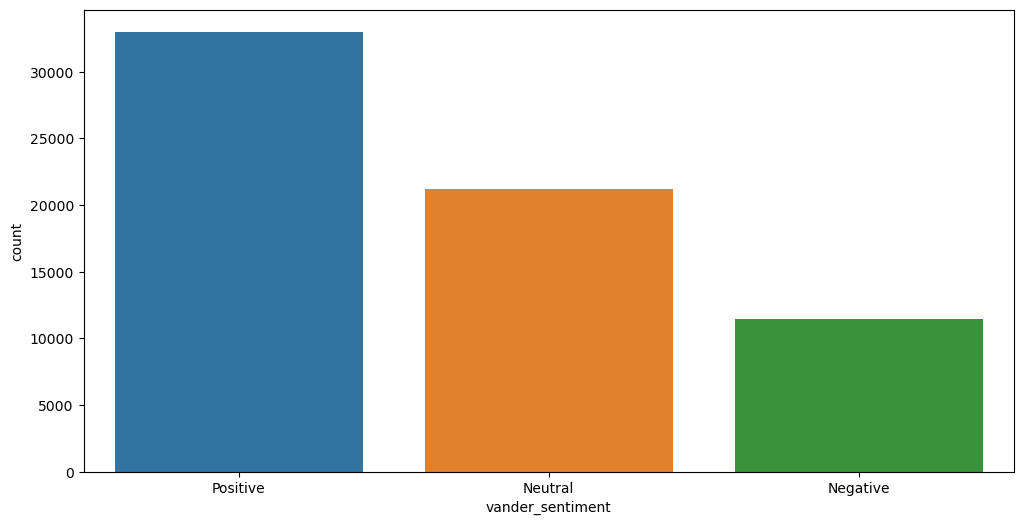

In [196]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='vander_sentiment',data=amzn_tweet)

In [197]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp.vander_sentiment,
    values = temp.body,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

The above plots reveal that there are more positive tweets 

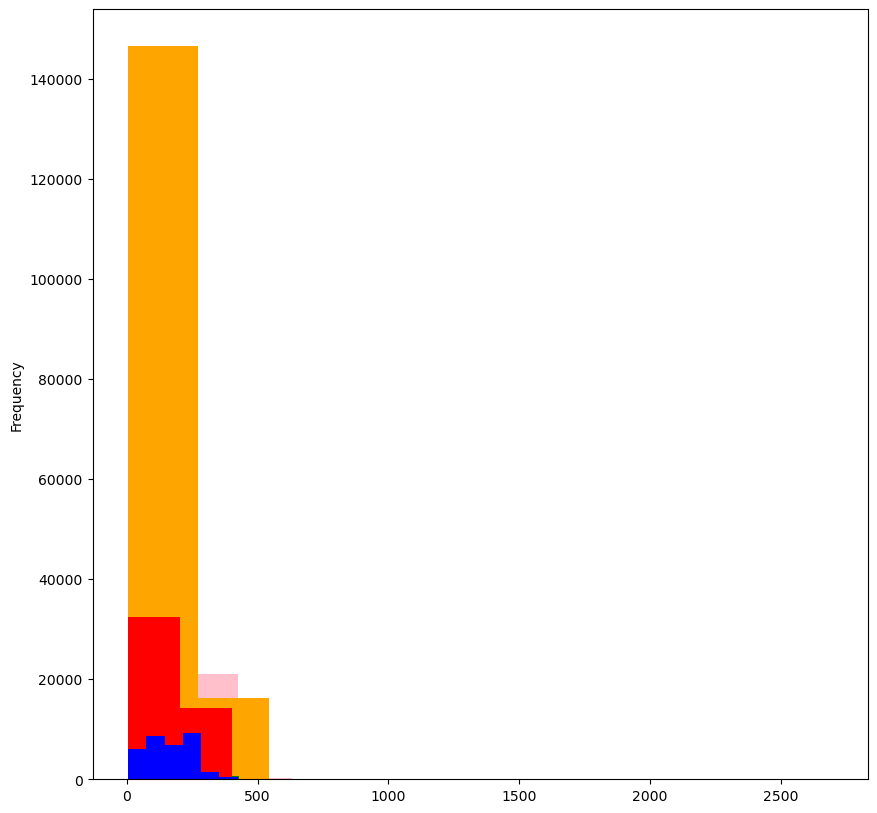

In [198]:
length_amzn = amzn_tweet['body'].str.len().plot.hist(color = 'pink', figsize = (10, 10))
length_apple = apl_tweet['body'].str.len().plot.hist(color = 'orange', figsize = (10, 10))
length_tesla = tesla_tweet['body'].str.len().plot.hist(color = 'green', figsize = (10, 10))
length_microsoft = msft_tweet['body'].str.len().plot.hist(color = 'red', figsize = (10, 10))
length_google = ggl_tweet['body'].str.len().plot.hist(color = 'blue', figsize = (10, 10))


From the above plot it is clear that the frequency of apple tweets is more

Text(0.5, 1.0, 'common words')

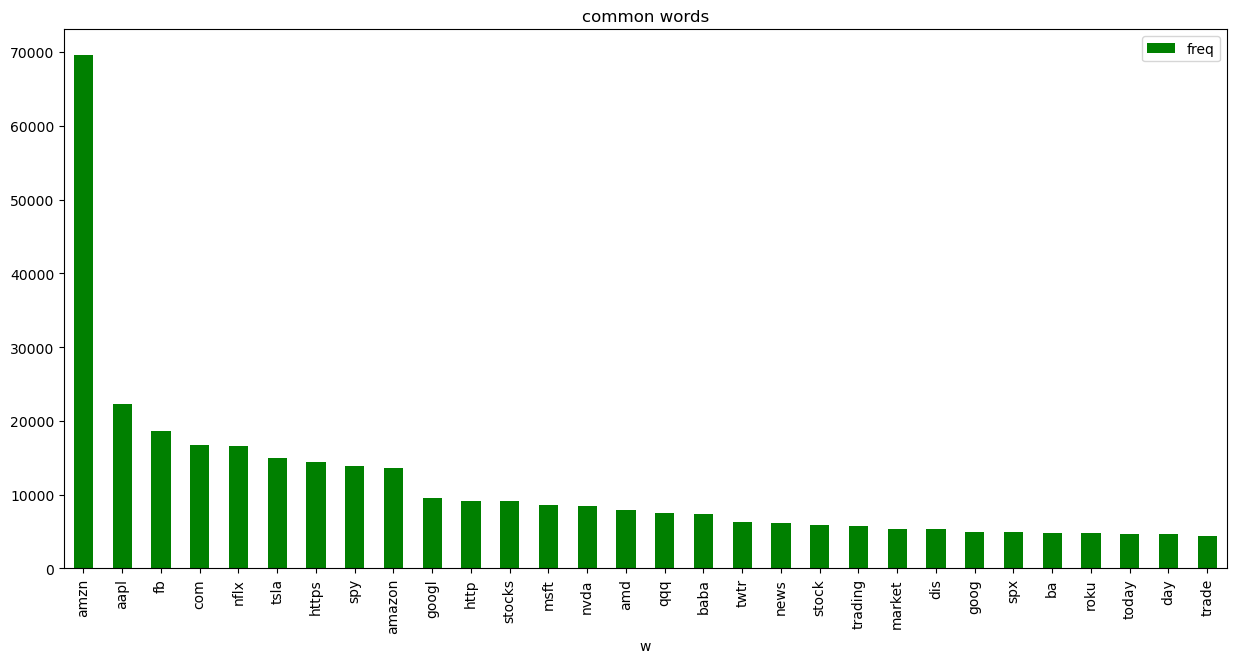

In [199]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
w = cv.fit_transform(amzn_tweet.body)

s_w = w.sum(axis=0)

w_f = [(word, s_w[0, i]) for word, i in cv.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(w_f, columns=['w', 'freq'])

frequency.head(30).plot(x='w', y='freq', kind='bar', figsize=(15, 7), color = 'green')
plt.title("common words")

frequency of common words for amazon tweets

Text(0.5, 1.0, 'common words')

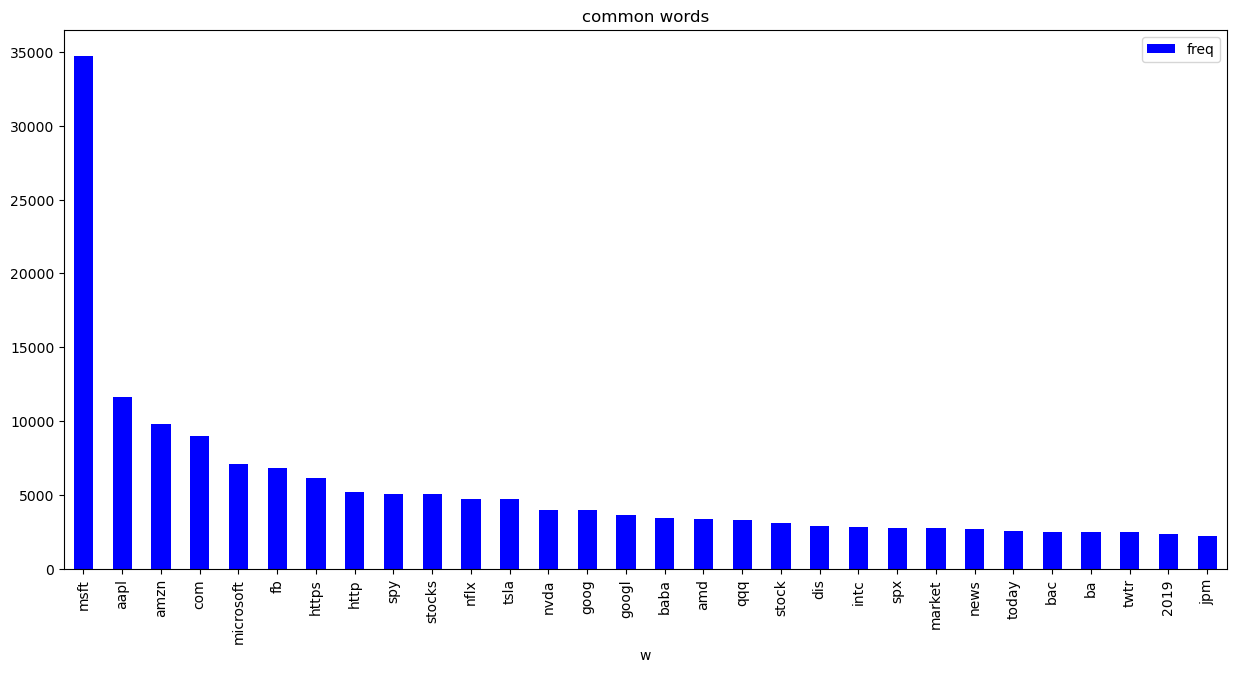

In [200]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
w = cv.fit_transform(ggl_tweet.body)

s_w = w.sum(axis=0)

w_f = [(word, s_w[0, i]) for word, i in cv.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(w_f, columns=['w', 'freq'])

frequency.head(30).plot(x='w', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("common words")

frequency of common words for google tweets

Text(0.5, 1.0, 'common words')

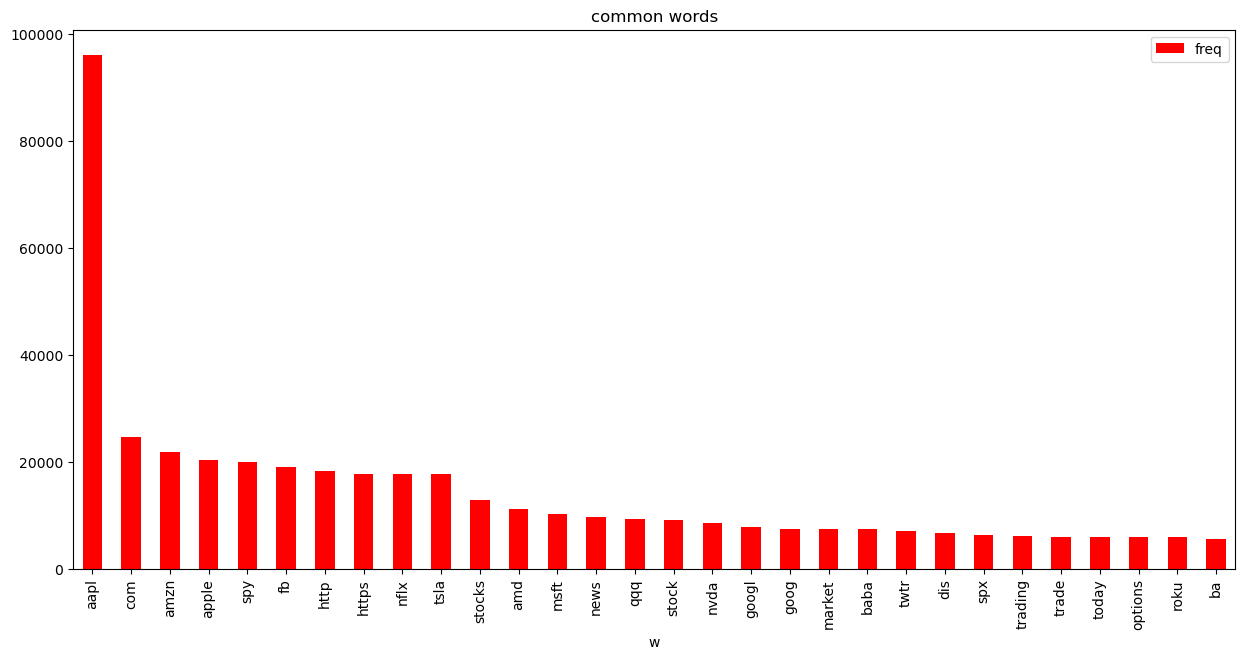

In [201]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
w = cv.fit_transform(tesla_tweet.body)

s_w = w.sum(axis=0)

w_f = [(word, s_w[0, i]) for word, i in cv.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(w_f, columns=['w', 'freq'])

frequency.head(30).plot(x='w', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("common words")

frequency of common words for tesla tweets

Text(0.5, 1.0, 'common words')

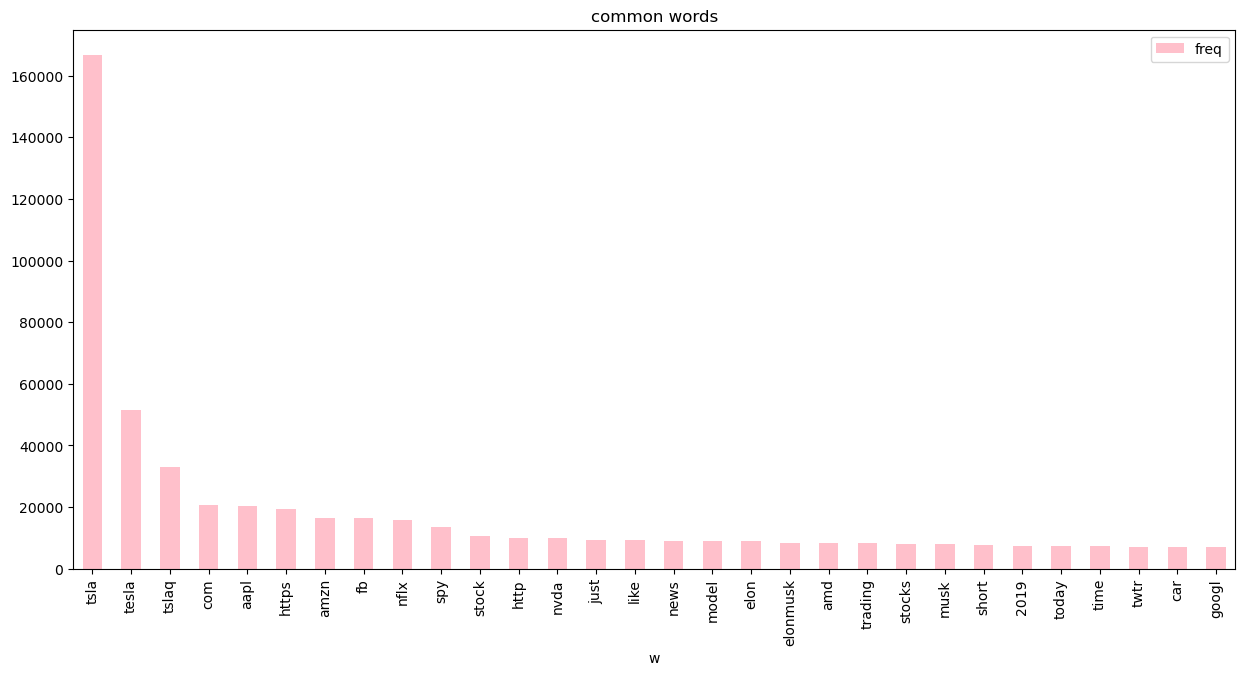

In [202]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
w = cv.fit_transform(apl_tweet.body)

s_w = w.sum(axis=0)

w_f = [(word, s_w[0, i]) for word, i in cv.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(w_f, columns=['w', 'freq'])

frequency.head(30).plot(x='w', y='freq', kind='bar', figsize=(15, 7), color = 'pink')
plt.title("common words")

frequency of common words for apple tweets

Text(0.5, 1.0, 'common words')

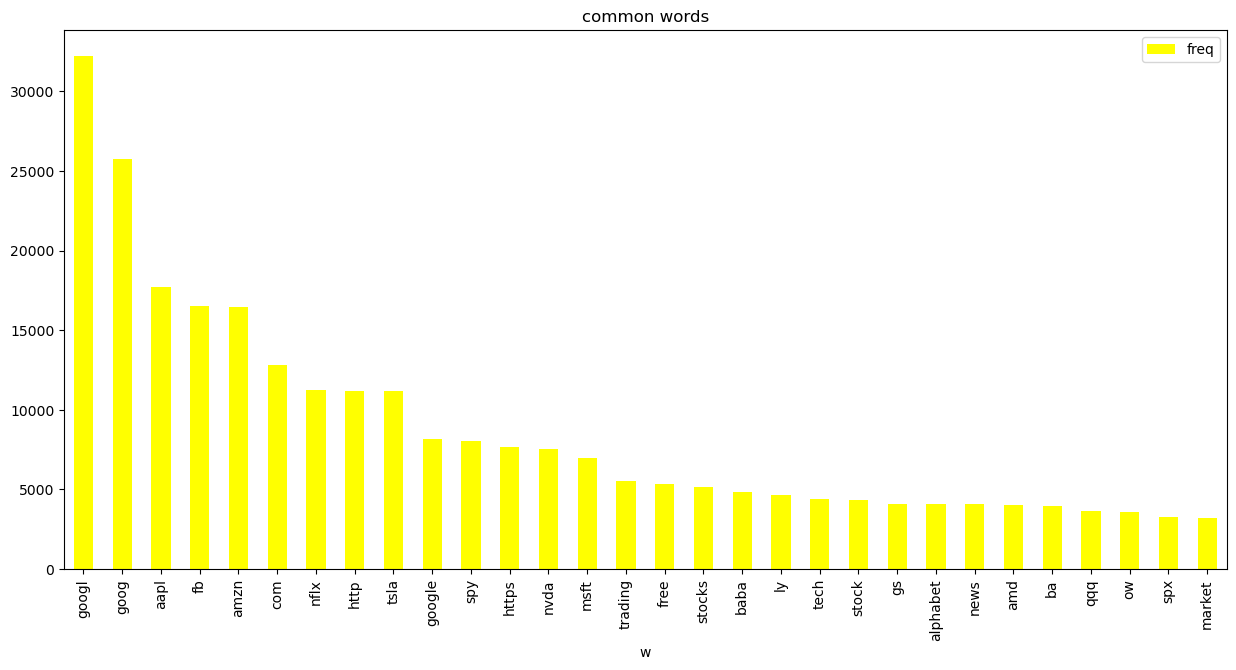

In [203]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
w = cv.fit_transform(msft_tweet.body)
s_w = w.sum(axis=0)

w_f = [(word, s_w[0, i]) for word, i in cv.vocabulary_.items()]
w_f = sorted(w_f, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(w_f, columns=['w', 'freq'])

frequency.head(30).plot(x='w', y='freq', kind='bar', figsize=(15, 7), color = 'yellow')
plt.title("common words")

frequency of common words for microsoft tweets

In [204]:
from collections import Counter
tweets['t_l'] = tweets['body'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweets['t_l'] for item in sublist])
t = pd.DataFrame(top.most_common(30))
t.columns = ['COMMON_WORDS','COUNT']
t.style.background_gradient(cmap='Purples')

,COMMON_WORDS,COUNT
0,the,184651
1,to,157603
2,$TSLA,130879
3,$AAPL,113045
4,a,110418
5,and,101528
6,of,96457
7,for,94843
8,$AMZN,94469
9,in,92581


count of commom words in tweets

In [205]:
import plotly.express as px
fig = px.bar(t, x="COUNT", y="COMMON_WORDS", title='COMMON WORDS', orientation='h', 
             width=800, height=800,color='COMMON_WORDS')
fig.show()

[Text(0.5, 1.0, 'missing values')]

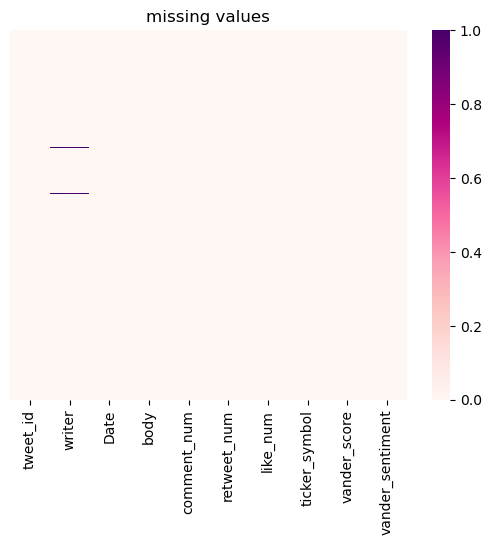

In [206]:
sns.heatmap(amzn_tweet.isnull(), cbar=True, yticklabels=False, cmap='RdPu').set(title='missing values')



[Text(0.5, 1.0, 'missing values')]

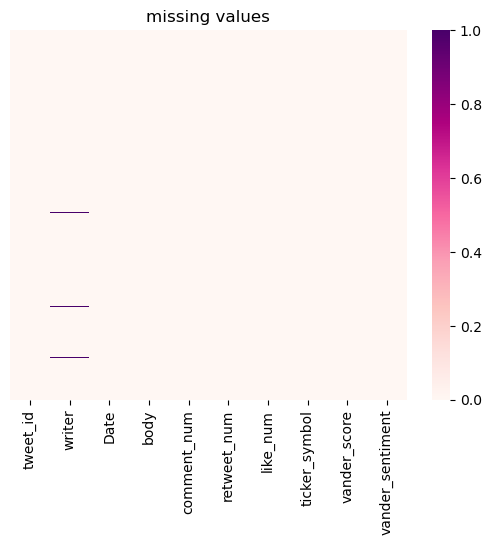

In [207]:
sns.heatmap(tesla_tweet.isnull(), cbar=True, yticklabels=False, cmap='RdPu').set(title='missing values')

[Text(0.5, 1.0, 'missing values')]

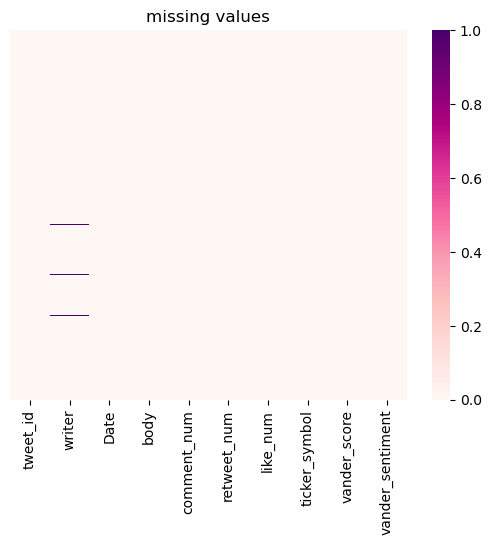

In [208]:
sns.heatmap(ggl_tweet.isnull(), cbar=True, yticklabels=False, cmap='RdPu').set(title='missing values')

[Text(0.5, 1.0, 'missing values')]

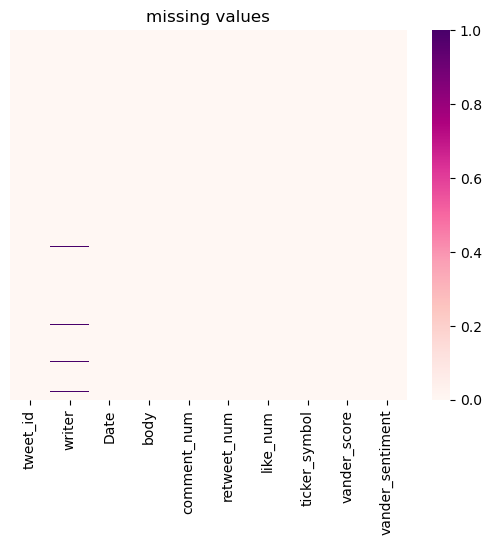

In [209]:
sns.heatmap(msft_tweet.isnull(), cbar=True, yticklabels=False, cmap='RdPu').set(title='missing values')

[Text(0.5, 1.0, 'missing values')]

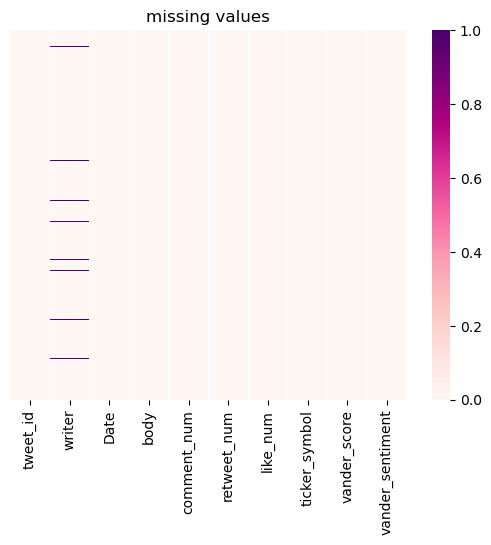

In [210]:
sns.heatmap(apl_tweet.isnull(), cbar=True, yticklabels=False, cmap='RdPu').set(title='missing values')

the above plots are for the missing values in the columns

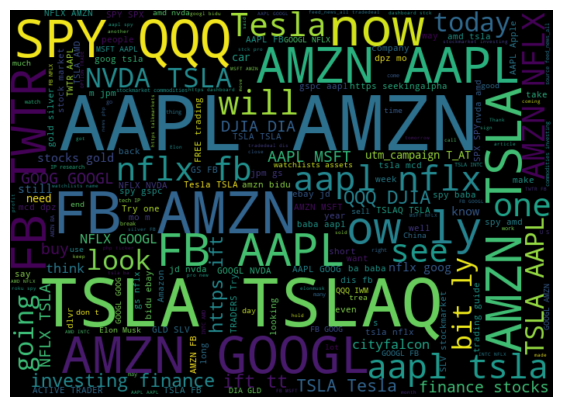

In [211]:
from wordcloud import WordCloud 
a_w = ' '.join([body for body in tweets.body])
wordcloud = WordCloud(width=700, height=500, random_state=50, max_font_size=100).generate(a_w)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

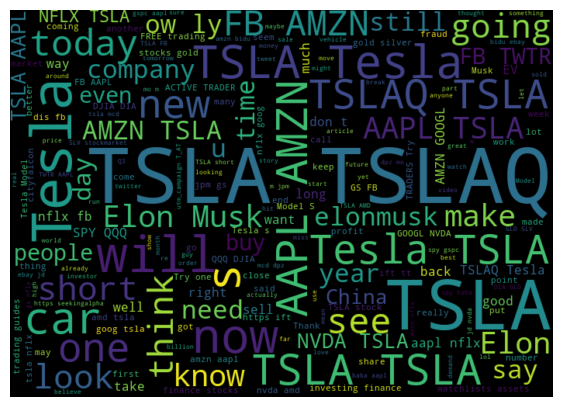

In [212]:
from wordcloud import WordCloud 
a_w = ' '.join([body for body in apl_tweet.body])
wordcloud = WordCloud(width=700, height=500, random_state=50, max_font_size=100).generate(a_w)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

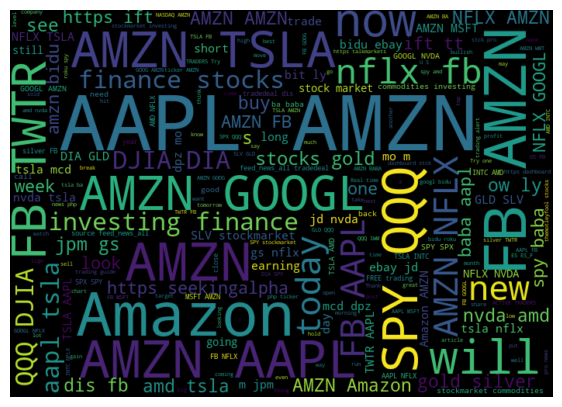

In [213]:
a_w = ' '.join([body for body in amzn_tweet.body])
wordcloud = WordCloud(width=700, height=500, random_state=50, max_font_size=100).generate(a_w)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

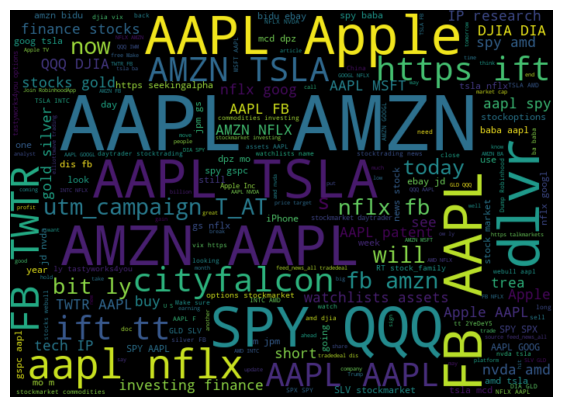

In [214]:
a_w = ' '.join([body for body in tesla_tweet.body])
wordcloud = WordCloud(width=700, height=500, random_state=50, max_font_size=100).generate(a_w)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

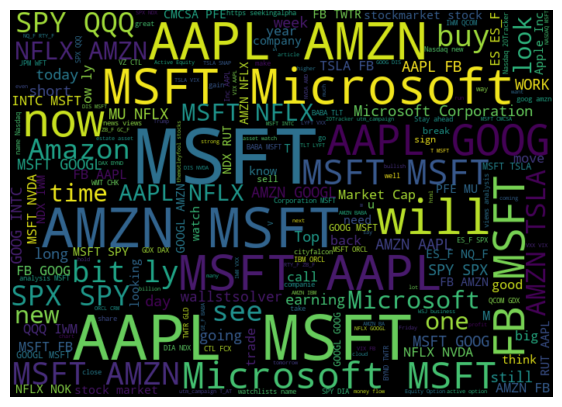

In [215]:
a_w = ' '.join([body for body in ggl_tweet.body])
wordcloud = WordCloud(width=700, height=500, random_state=50, max_font_size=100).generate(a_w)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

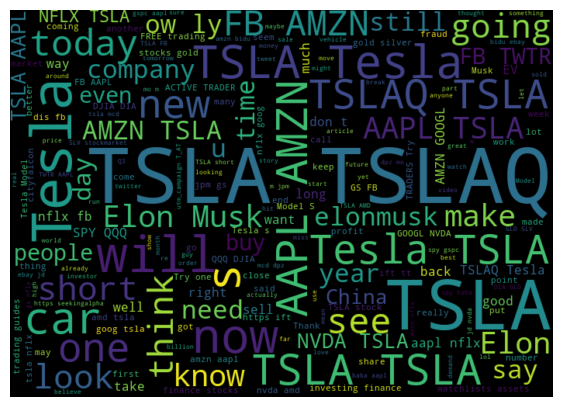

In [216]:
a_w = ' '.join([body for body in apl_tweet.body])
wordcloud = WordCloud(width=700, height=500, random_state=50, max_font_size=100).generate(a_w)

plt.figure(figsize=(7, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The above are the word cloud of amazon,google,tesla,microsoft,apple tweets

<AxesSubplot:>

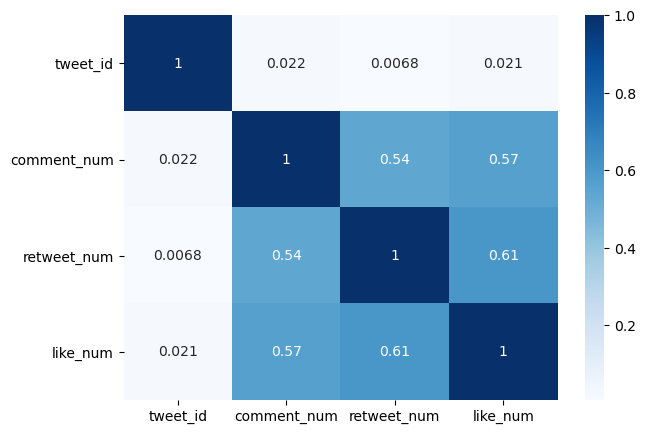

In [217]:
plt.figure(figsize=(7,5))
sns.heatmap(tweets.corr(),cmap='Blues',annot=True)

<AxesSubplot:>

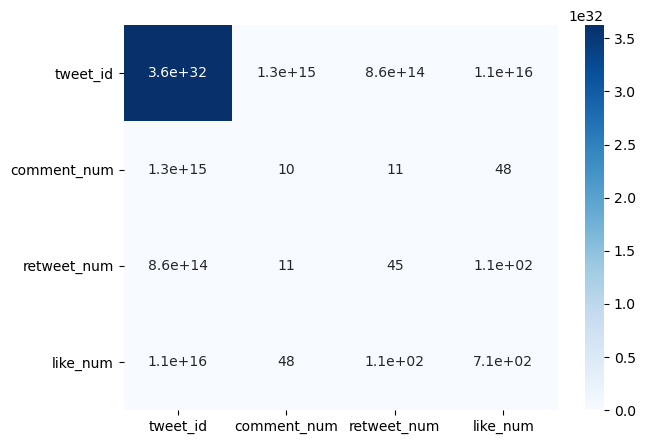

In [218]:
plt.figure(figsize=(7,5))
sns.heatmap(tweets.cov(),cmap='Blues',annot=True)

In [236]:
tickers = ['AMZN', 'GOOG,GOOGL', 'MSFT', 'TSLA', 'AAPL']
stocks = pd.concat([amzn_stock,google_stock,microsoft_stock,tesla_stock,apple_stock], axis=1, keys=tickers)

In [237]:
stocks.columns.names = [' Ticker','Stock Info']
stocks.head()

Ticker          AMZN                                                          \
Stock Info Unnamed: 0        Date       High        Low       Open      Close   
0                   0  2019-07-01  96.490997  95.733002  96.149002  96.109497   
1                   1  2019-07-02  96.739502  95.331497  95.969002  96.715500   
2                   2  2019-07-03  97.079498  96.525002  96.794502  96.949997   
3                   3  2019-07-05  97.294998  96.264999  96.430000  97.145500   
4                   4  2019-07-08  97.800003  96.412498  96.706001  97.615997   

 Ticker                         GOOG,GOOGL              ...       TSLA  \
Stock Info    Volume  Adj Close Unnamed: 0        Date  ...     Volume   
0           63842000  96.109497          0  2019-07-01  ...  123201000   
1           52918000  96.715500          1  2019-07-02  ...  138885000   
2           33806000  96.949997          2  2019-07-03  ...  213016500   
3           52568000  97.145500          3  2019-07-05  ...  105985500   
4           57668000  97.615997          4  2019-07-08  ...   88207500   

 Ticker                     AAPL                                               \
Stock Info  Adj Close Unnamed: 0        Date       High        Low       Open   
0           15.144667          0  2019-07-01  51.122501  50.162498  50.792500   
1           14.970000          1  2019-07-02  50.782501  50.340000  50.352501   
2           15.660000          2  2019-07-03  51.110001  50.672501  50.820000   
3           15.540000          3  2019-07-05  51.270000  50.724998  50.837502   
4           15.356000          4  2019-07-08  50.349998  49.602501  50.202499   

 Ticker                                        
Stock Info      Close       Volume  Adj Close  
0           50.387501  109012000.0  49.029461  
1           50.682499   67740800.0  49.316505  
2           51.102501   45448000.0  49.725197  
3           51.057499   69062000.0  49.681393  
4           50.005001  101354400.0  48.657265  

[5 rows x 40 columns]

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}, xlabel=' Ticker-Stock Info', ylabel=' Ticker-Stock Info'>

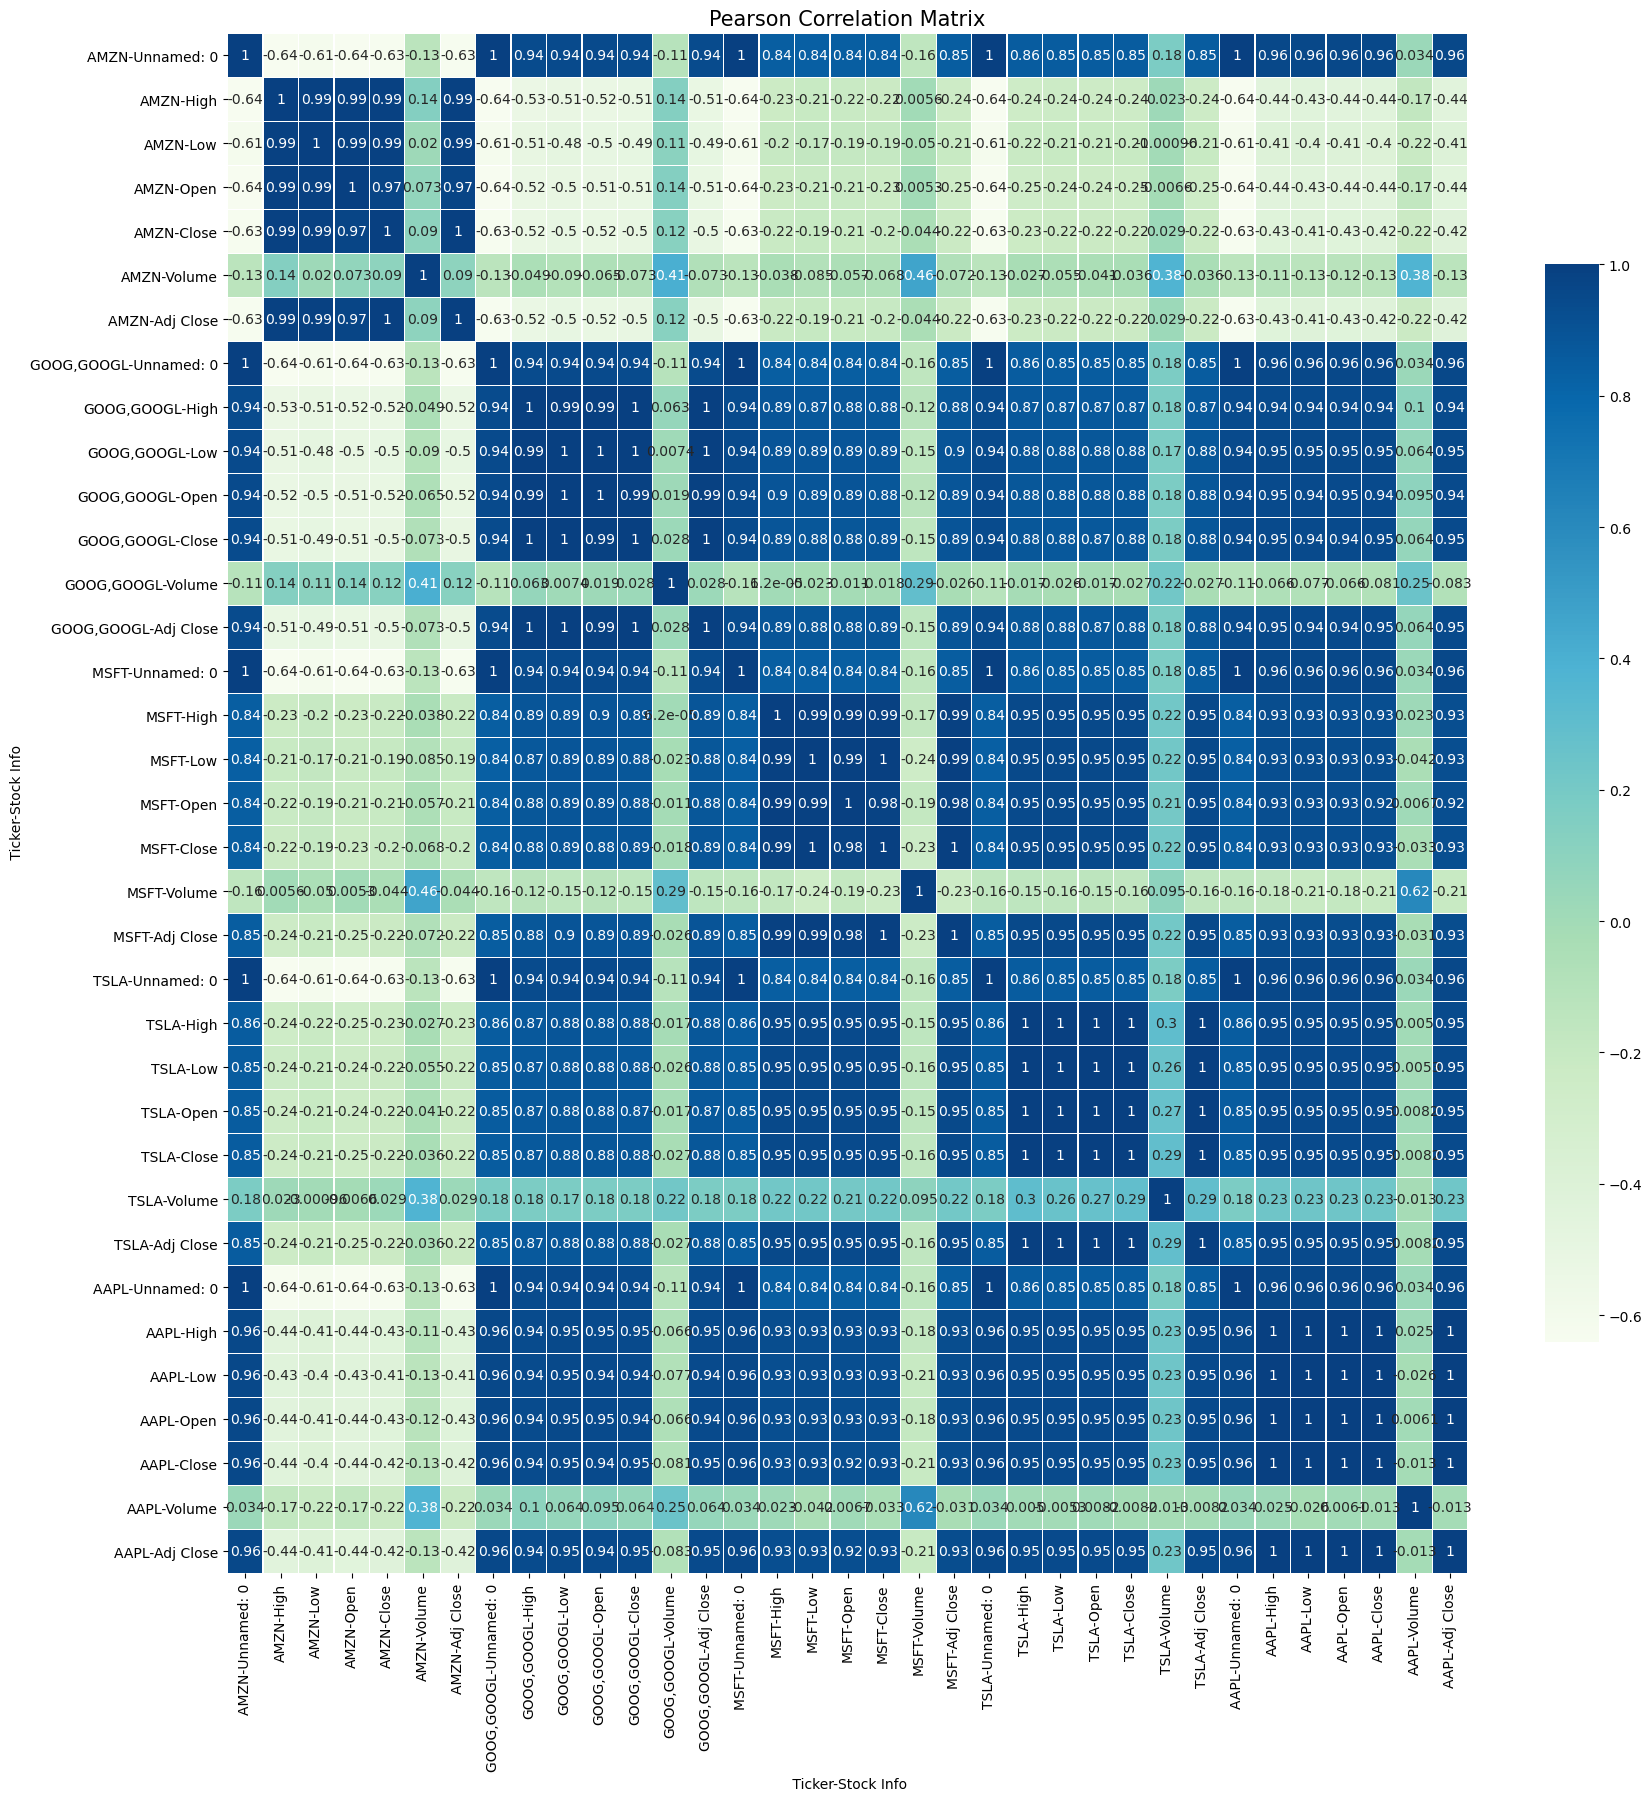

In [238]:
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation Matrix',fontsize=15)
sns.heatmap(stocks.corr(), annot=True, cmap='GnBu',
            linewidths=0.25, linecolor='w', cbar_kws={"shrink": .7})

In [239]:
from scipy import stats as stat

def tweet_v_imp(tweets,stocks,title):
    tweet_s1 = tweets.groupby('Date').size().shift(-1).dropna() 
    s_d = stocks['Volume'].dropna()
    corr, pval = stat.spearmanr(tweet_s1.reindex(s_d.index), s_d,nan_policy='omit')
    t_v = tweets.groupby('Date').size().rolling(30).mean().dropna()
    s_d = stocks['Volume'].rolling(30).mean().dropna()
    f = plt.figure(figsize=(12,8))
    a1 = f.add_subplot()
    a2 = f.add_subplot()
    a2 = a1.twinx()
    a1.plot(t_v.index,t_v,color='green',label='Tweet Volume')
    a2.plot(s_d.index,s_d,color='red',label='Trade Volume')
    a2.set_title(title+" \n Spearman correlation of tweet volume VS stock volume: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    l, lb = a1.get_legend_handles_labels()
    l2, lb2 = a2.get_legend_handles_labels()
    a2.legend(l + l2, lb + lb2, loc=0)
    plt.show()
    

/var/folders/xl/bkp1f6b120x9rzphm4m9hb4h0000gn/T/ipykernel_8073/1715262651.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



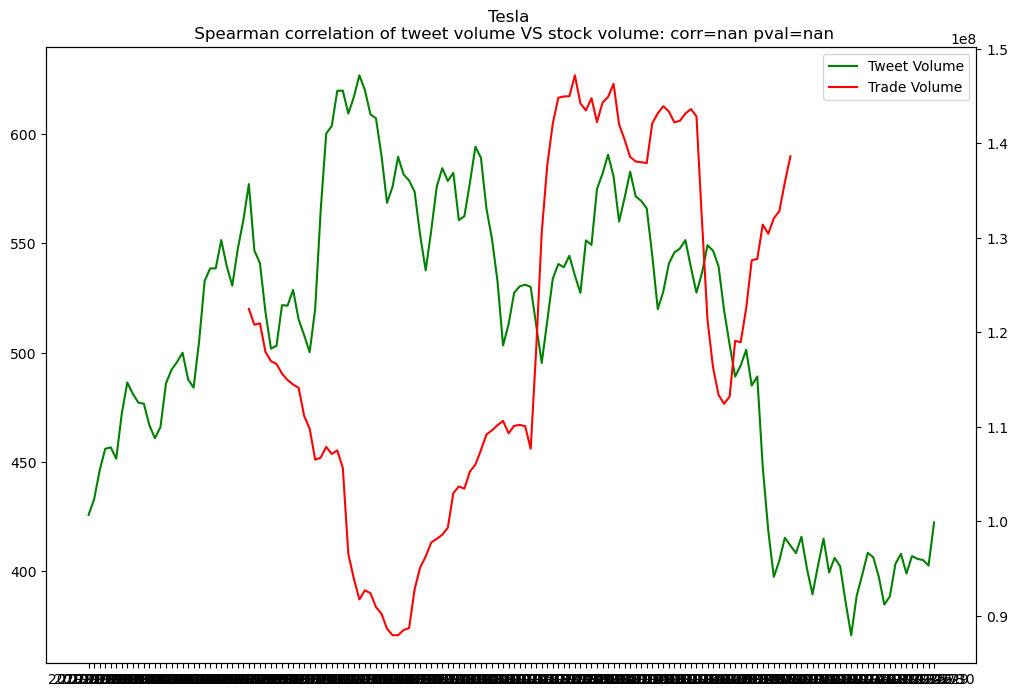

In [240]:
tweet_v_imp(tesla_tweet,tesla_stock,"Tesla")  

/var/folders/xl/bkp1f6b120x9rzphm4m9hb4h0000gn/T/ipykernel_8073/1715262651.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



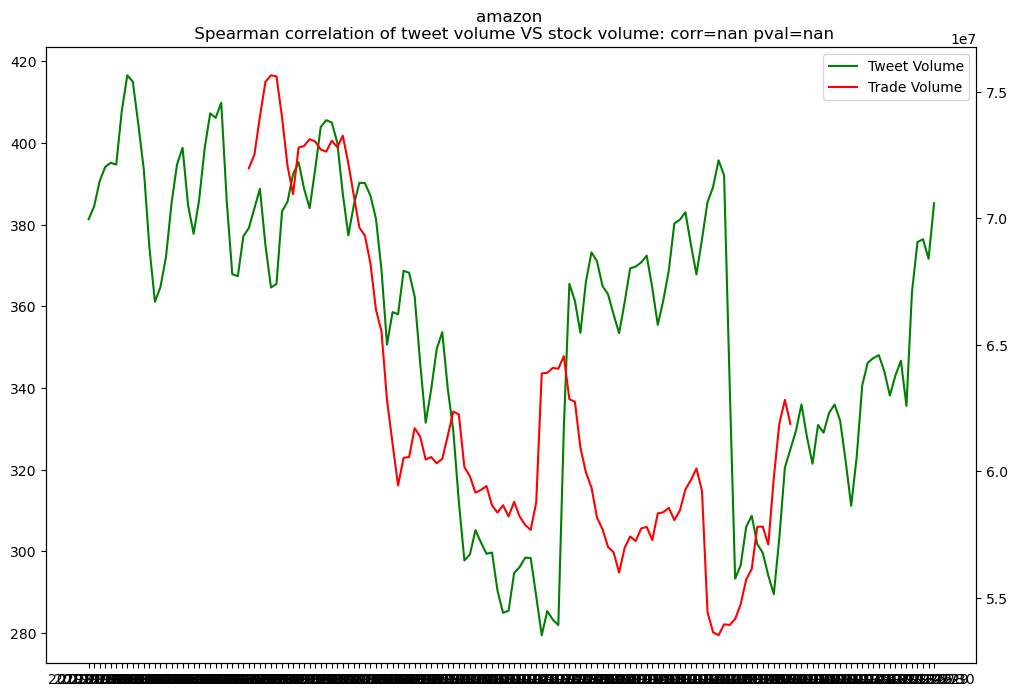

In [241]:
tweet_v_imp(amzn_tweet,amzn_stock,"amazon")  

/var/folders/xl/bkp1f6b120x9rzphm4m9hb4h0000gn/T/ipykernel_8073/1715262651.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



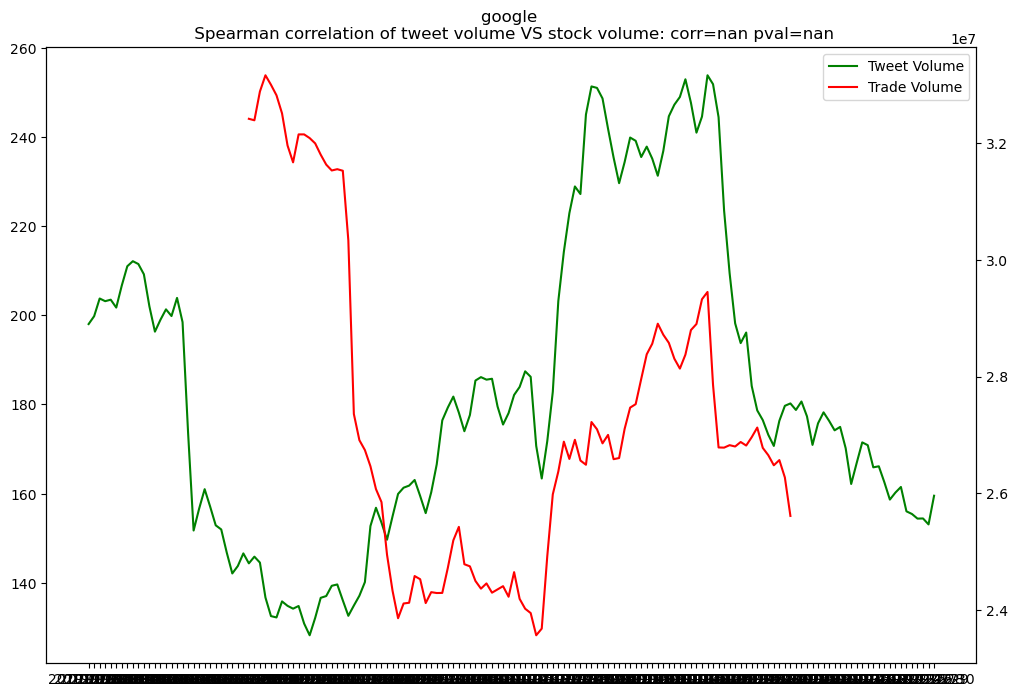

In [242]:
tweet_v_imp(ggl_tweet,google_stock,"google")  

/var/folders/xl/bkp1f6b120x9rzphm4m9hb4h0000gn/T/ipykernel_8073/1715262651.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



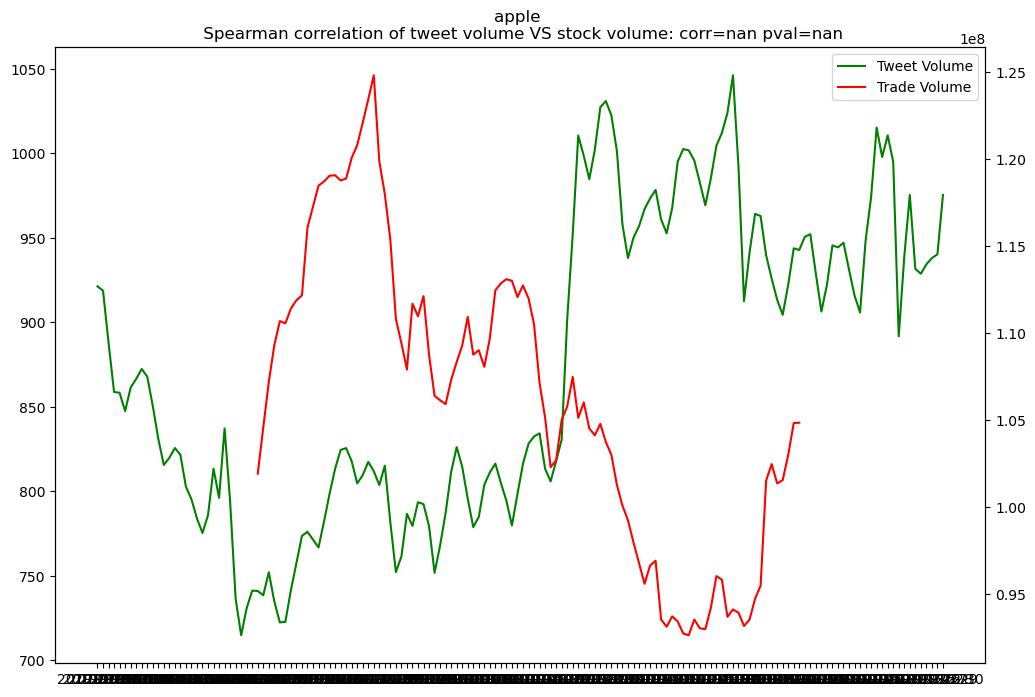

In [243]:
tweet_v_imp(apl_tweet,apple_stock,"apple")  

/var/folders/xl/bkp1f6b120x9rzphm4m9hb4h0000gn/T/ipykernel_8073/1715262651.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



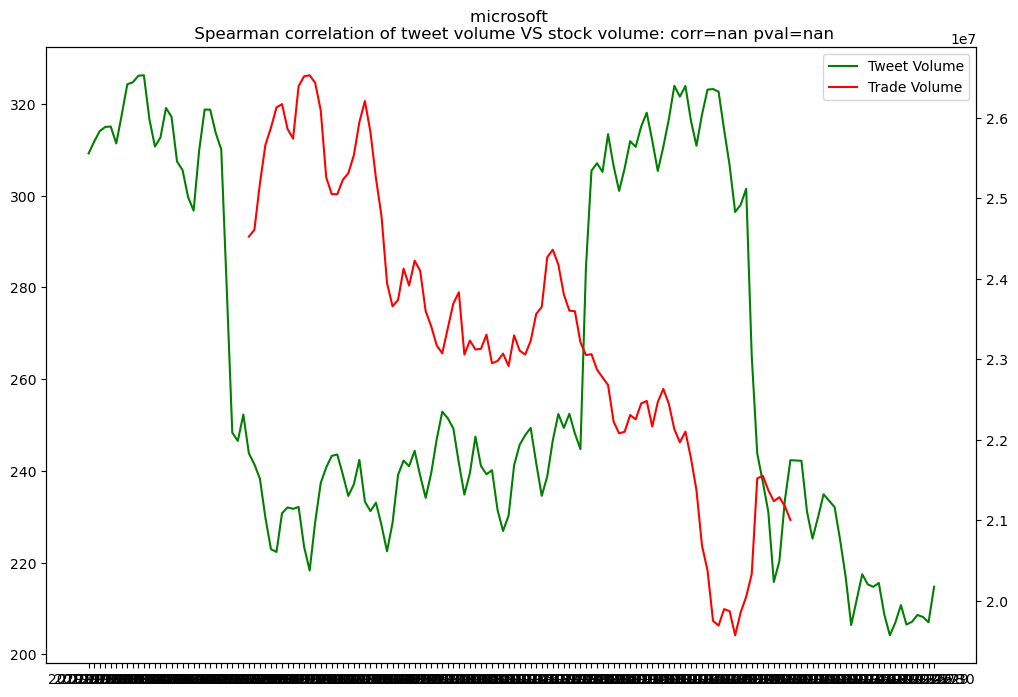

In [244]:
tweet_v_imp(msft_tweet,microsoft_stock,"microsoft")  

To find out whether the quantity of tweets has an impact on the volume traded of the specific company we used spearman correlation because it does not assume that the dataset is normally distributed.From the above plots the hypotheses is null, which implies there is no association between the number of tweets and the volume of stocks.So this is the reason we are not using them in prediction.

In [258]:
senti_tweets = senti_tweets.loc[:, ~senti_tweets.columns.str.contains('^Unnamed')]
senti_tweets.corr()


,tweet_id,comment_num,retweet_num,like_num,compound,neg,neu,pos,Prices
tweet_id,1.000000,0.021192,0.025393,0.020464,0.002255,-0.010461,0.044747,-0.060039,0.054666
comment_num,0.021192,1.000000,0.586073,0.722103,0.007050,0.082808,-0.057008,-0.004123,-0.040156
retweet_num,0.025393,0.586073,1.000000,0.782720,0.007618,0.065124,-0.044445,-0.004322,-0.034078
like_num,0.020464,0.722103,0.782720,1.000000,0.005139,0.151537,-0.126029,0.027194,-0.098209
compound,0.002255,0.007050,0.007618,0.005139,1.000000,0.055544,-0.158769,0.188174,-0.259259
neg,-0.010461,0.082808,0.065124,0.151537,0.055544,1.000000,-0.776900,0.104378,-0.643341
neu,0.044747,-0.057008,-0.044445,-0.126029,-0.158769,-0.776900,1.000000,-0.707031,0.551838
pos,-0.060039,-0.004123,-0.004322,0.027194,0.188174,0.104378,-0.707031,1.000000,-0.148723
Prices,0.054666,-0.040156,-0.034078,-0.098209,-0.259259,-0.643341,0.551838,-0.148723,1.000000


<AxesSubplot:>

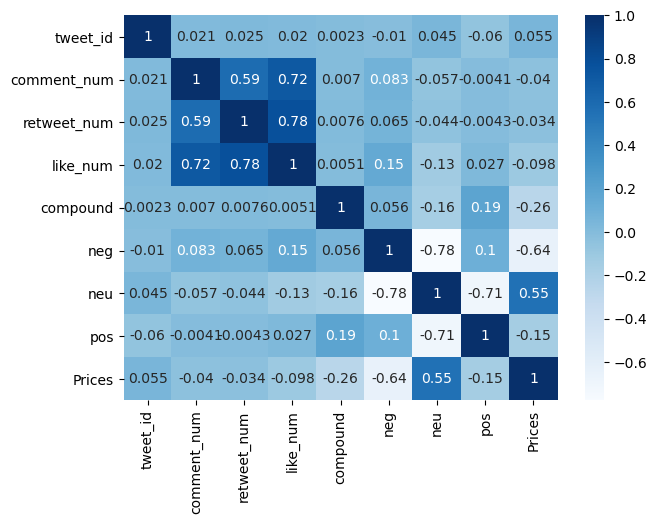

In [259]:
plt.figure(figsize=(7,5))
sns.heatmap(senti_tweets.corr(),cmap='Blues',annot=True)

<AxesSubplot:>

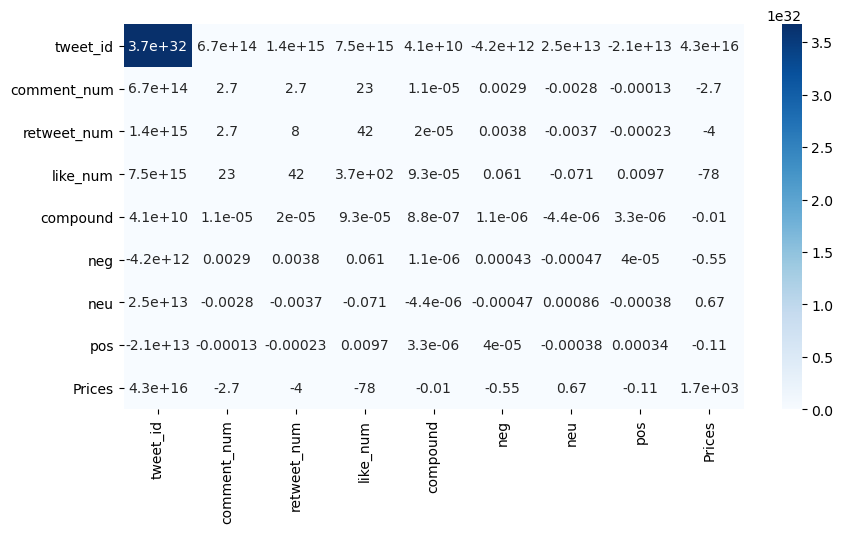

In [261]:
plt.figure(figsize=(10,5))
sns.heatmap(senti_tweets.cov(),cmap='Blues',annot=True)

This analysis has a modest negative effect, but the correlation diagram shown above does not allow us to draw any conclusions.